# **Optimizer**

- 참고도서
  - 밑바닥부터 시작하는 딥러닝 (사이토 고키 저/개앞맵시 역/한빛미디어)
- 그림/내용 출처
  - https://www.slideshare.net/yongho/ss-79607172
  - https://heeya-stupidbutstudying.tistory.com/entry/ML-신경망에서의-Optimizer-역할과-종류

- 최적화 (Optimization)
  - 신경망의 목적
    - 손실함수의 값을 최대한 낮추는 매개변수를 찾는 것
    - 이러한 문제를 푸는 것을 **최적화(Optimization)** 라고 함
  - 목적 달성을 방해하는 것들
    - 매개변수의 공간은 넓고 복잡해서 최적의 해를 찾기 어렵다
    - 최솟값을 한 번에 구해주는 수식이란 없다
    - 심층 신경망(DNN, Deep Neural Network)에서는 매개변수의 수가 너무 많아서 더욱 심각한 사태를 만든다
  - 지금까지 학습한 최적의 매개변수 찾는 법
    - 매개변수의 기울기(미분) 이용하기
      - 매개변수의 기울기를 구해서 
      - 기울어진 방향으로 매개변수의 값을 갱신하는 작업을 수없이 반복함으로써
      - 점차적으로 최적의 값에 접근하는 방법
      - 이러한 방법을 확률적 경사 하강법(Stochastic Gradient Decent, SGD) 이라고 함
  - 그러나 그 외의 다른 방법도 존재함


- Optimizer의 계보
<br /><br />
<center><img src='https://drive.google.com/uc?export=download&id=1ic_TKU136Zik7IatRXgW_lDlHoptpT_6' width="" height ="" /></center>

<center><img src='https://drive.google.com/uc?export=download&id=1ApdM7dZKlBKWd1GTCM8tDyzJVuyh-0Lb' width="" height ="" /></center>

## **1. 경사하강법(GD, Gradient Decent)**

- 손실함수를 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐
<br /><br /> 
- 개요
  - 가장 기본적이지만 가장 많이 사용되는 최적화 알고리즘
  - 손실 함수의 1차 도함수에 의존하는 first-order 최적화 알고리즘으로, 함수가 최소값에 도달할 수 있도록 어떤 방향으로 가중치를 업데이트해야 하는지 계산
  - 역전파(back propagation)를 통해 loss가 한 계층에서 다른 계층으로 전달되고, 다시 이 loss에 따라 모델의 파라미터가 수정되어 손실을 최소화

- 경사하강법의 문제점
  - 한번 학습할 때마다 모든 데이터셋을 이용함
    - 즉, 손실함수의 최솟값을 찾아 나가기 위해 한 칸 전진할 때마다 모든 데이터를 다 훑는다는 것
    - 따라서 학습이 굉장히 오래 걸린다(최솟값을 찾는데 오래 걸린다)

  - Local Minima
    - 진짜 목표인 global minimum을 찾지 못하고 local minimum에 갖혀버릴 수도 있음
    - 어떤 파라미터 값에서는 local minimum에 도달하게 되는데, 이 지점 근처에서는 왼쪽이든 오른쪽이든 이동하면 loss가 증가함

  - 메모리 한계
    - 모든 데이터를 한 번에 다 학습한다면 Hardware capacity에 따라 다르겠지만, '빅데이터'에 가까워질수록 가용 가능한 메모리에 다 올릴 수 없을 것    

  - 학습률 정하기
    - 학습률(step size, 혹은 learning rate)가 너무 크다면
      - 최솟값을 계산하도록 수렴하지 못하고 loss 값이 계속 커지는 방향으로 진행될 수도 있음
      - 또는 아예 최솟값에 제대로 수렴하지 못할 수도 있음
    - 학습률이 너무 작다면
      - 최솟값을 찾는데 오랜 시간이 걸림

<center><img src='https://drive.google.com/uc?export=download&id=110-8aeJDoMVSc-2evXmKS9qs2jD8QCW3' width="" height ="" />

## **2. 확률적 경사 하강법(SGD, Stochastic Gradient Descent)**

- 개요
  - 경사하강법의 문제점을 개선하기 위해 고안된 방법
  - SGD는 전체 입력 데이터로 가중치와 편향이 업데이트되는 것이 아니라, 그 안의 일부 데이터만 이용함
  - 전체 x, y 데이터에서 랜덤하게 배치 사이즈만큼 데이터를 추출해서 사용(미니 배치(mini batch)라고 함)
  - 이를 통해 학습 속도를 빠르게 할 수 있을 뿐만 아니라 메모리도 절약할 수 있음

<center><img src='https://drive.google.com/uc?export=download&id=1Rq0P99YZKKAAuafV6drmvnPk2LPcH4S1' width="" height ="" /></center>

    - epoch: 전체 데이터셋에 대해 한 번 학습을 완료하는 시점 (순전파/역전파 과정 거치기)
    - batch size: 한 배치(묶음)에 있는 총 학습 샘플의 수
    - iteration: 한 epoch를 완료하기 위해 실행하는 횟수

- 그러나 SGD도 GD의 고질적인 문제점인 학습률 설정, local minima 문제, oscillation 문제를 해결하진 못했다

In [3]:
# coding: utf-8
import numpy as np

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

## **3. 모멘텀(Momentum)**

- 개요
  - 모멘텀은 SGD의 높은 편차를 줄이고 수렴을 부드럽게 하기 위해 고안됨
  - 이는 관련 방향으로의 수렴을 가속화하고 관련 없는 방향으로의 변동을 줌
  - 말 그대로 이동하는 방향으로 나아가는 '관성'을 주는 것
  - $\gamma$ 는 현재 기울기 값(현재 가속도)뿐만 아니라 (과거의 가속도로 인한) 현재 속도를 함께 고려하여 이동 속도를 나타내는 momentum term 임
    - $v_t={\gamma}v_{t-1}+{\eta}\nablaΘJ(Θ)$

    - 이전 gradient들의 영향력을 매 업데이트마다 배 씩 감소
    - momentum term 는 보통 0.9 정도로 정함
<br /><br />
    <center><img src='https://drive.google.com/uc?export=download&id=1bC3b0VMnArJTP_Ge7acdzC37LdKpIFDC' width="" height ="" /></center>

- 장점
  - SGD에 비해 파라미터의 분산이 줄어들고 덜 oscillate한다
  - 빠르게 수렴한다. 
- 단점
  - $\gamma$ 라는 새로운 하이퍼 파라미터가 추가되었으므로 적절한 값을 설정해줘야 한다.

In [4]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

## **4. NAG(Nesterov Accelerated Gradient)**

- 모멘텀이 너무 높으면 알고리즘이 minima를 놓치고 건너뛰어버릴 우려가 있음
- NAG
  - '앞을 내다보는' 알고리즘
  - momentum step을 고려하여, 일단 목표가 momentum step을 먼저 이동했다고 생각한 후 그 자리에서의 gradient를 구해서 gradient step을 이동함

  - $v_t={\gamma}v_{t-1}+{\eta}\nabla_ΘJ(Θ_t-{\gamma}v_{t-1})$

  - 위 식을 보면 gradient와 momentum step이 독립적으로 계산되는 것이 아님을 알 수 있다.
<br /><br />

  <center><img src='https://drive.google.com/uc?export=download&id=1r1rWB9VP1Fxz-Wq4SINj5KohFZTCYMGa' width="" height ="" /></center>
<br /><br />
- 장점
  - 모멘텀에 비해 멈춰야 할 지점(minima)에서 제동을 걸기 쉽다. 
  - 일단 모멘텀으로 이동을 반 정도 한 후, 어떤 방식으로 이동해야 할 지 결정할 수 있다. 
- 단점
  - 여전히 하이퍼 파라미터 값을 수동으로 결정해줘야 한다는 단점이 존재한다.

In [5]:
class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

## **4. AdaGrad**

- 설명하고 있는 모든 옵티마이저의 단점 중 하나는 학습률이 모든 파라미터와 각 cycle에 대해 일정하다는 것

- Adagrad
  - 각 파라미터와 각 단계마다 학습률 을 변경할 수 있다.
  - second-order 최적화 알고리즘의 유형으로, 손실함수의 도함수에 대해 계산된다.

  - AdaGrad의 기본적인 아이디어
    - 지금까지 많이 변화하지 않은 변수들은 step size를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게 하자
    - 자주 등장하거나 변화를 많이 한 변수들의 경우 optimum에 가까이 있을 확률이 높기 때문에 작은 크기로 이동하면서 세밀한 값을 조정하고, 적게 변화한 변수들은 optimum 값에 도달하기 위해서는 많이 이동해야할 확률이 높기 때문에 먼저 빠르게 loss 값을 줄이는 방향으로 이동하려는 방식
    - 출처 : http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html

  - Adagrad의 한 스텝을 수식화하면,
  - $G_t=G_{t-1}+(\nabla_ΘJ(Θ_t))^2 \\\ Θ_{t+1}=Θ_t-{{\eta}\over{\sqrt{{G_t}+\epsilon}}}\cdot{\nabla_ΘJ(Θ_t)}$

  - $G_t$는 k차원 벡터, ‘time step t까지 각 변수가 이동한 gradient의 sum of squares' -> $\Theta$ 를 업데이트 할 때 $G_t$의 루트값에 반비례한 크기로 이동
  - $\epsilon$은 0으로 나누어지는 것을 방지하는 smoothing term

- 단점
  - 각 학습 파라미터에 대해 학습률이 바뀌기 때문에 수동으로 조정할 필요가 없지만, 이계도함수를 계산해야 하기 때문에 계산 비용이 많이 듦
  - Adagrad는 학습을 진행하면 진행할 수록 학습률이 줄어든다는 문제점 존재
    - $G_t$에 계속 제곱한 값을 넣어주기 때문에 $G_t$의 값들은 계속 커지므로, 학습이 오래 진행될 경우 학습률이 너무 작아져 결국 거의 움직이지 않게 됨. 즉, 최솟값에 도달하기도 전에 학습률이 0에 수렴해버릴 수도 있음

 

In [6]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## **5. RMSProp**

- 개요
  - RMSProp은 Adagrad에서의 $G_t$ 값이 무한히 커지는 단점을 해결하기 위해서 지수 이동평균(exponentially weighted moving average)를 이용함
  - Adagrad에서는 gradient의 제곱한 값을 계속 더해나가면서 $G_t$ 의 값을 구했는데, 여기서는 지수 이동평균을 이용해 가중치로 영향력을 decay 함

  -  $G_t={\gamma}G_{t-1}+(1-{\gamma})(\nabla_ΘJ(Θ_t))^2 \\\ Θ_{t+1}=Θ_t-{{\eta}\over{\sqrt{{G_t}+\epsilon}}}\cdot{\nabla_ΘJ(Θ_t)}$

  - Adagrad의 $G_t$ 식과 비교해보면, 해당 지수 이동평균 식이 RMSProp의 $G_t$ 에 반영된 것을 알 수 있음

  - $x_k = {\alpha}p_k+(1-{\alpha})x_{k-1}$ $where$ ${\alpha}={{2}\over{N+1}}$

  - 한 스텝이 지날때마다 $(1-\alpha)$ 라는 가중치가 이전 값에 곱해지는데, $(1-\alpha)$ 는 1보다 작기 때문에 시간이 지날수록 영향력이 줄어드는 효과가 있음
  - 따라서 $G_t$ 가 무한정 커지지 않을 수 있음

In [7]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## **6. Adam(Adaptive Moment Estimation)**

- 개요
  - Adagrad나 RMSProp처럼 각 파라미터마다 다른 크기의 업데이트를 진행하는 방법
  - Adam의 직관은 local minima를 뛰어넘을 수 있다는 이유만으로 빨리 굴러가는 것이 아닌, minima의 탐색을 위해 조심스럽게 속도를 줄이고자 하는 것
  - Adam은 AdaDelta와 같이 decaying average of squared gradients를 저장할 뿐만 아니라, 과거 gradient 의 decaying average도 저장함

  -  $m_t={\beta_1}m_{t-1}+(1-{\beta_1})\nabla_ΘJ(Θ) \\\ v_t={\beta_2}v_{t-1}+(1-{\beta_2})(\nabla_ΘJ(Θ))^2$

  - $m_t$ 와 $v_t$가 학습 초기에 0으로 biased 되는 것을 방지하기 위해 uncentered variance of the gradients인 $\hat{m_t}, \hat{v_t}$ 를 계산함

  - ${\hat{m_t}}={{m_t}\over{1-{\beta}^t_1}} \\\ {\hat{v_t}}={{v_t}\over{1-{\beta}^t_2}}$

  - 이 보정된 값들을 가지고 파라미터를 업데이트한다. 기존의 $G_t$ 자리에 $\hat{v_t}$ 를 넣고, gradient 자리에 \hat{m_t}$ 를 넣으면 됨

  - ${\Theta_{t+1}}=\Theta_t-{{\eta}\over{{\hat{v_t}}+\epsilon}}\cdot{\hat{m_t}}$

  - ${\beta}_1$의 값은 0.9, ${\beta}_2$는 0.999, ${\epsilon}$은 $(10exp(-8))$임
  - loss가 최솟값으로 빠르게 수렴하고 vanishing learning rate 문제, high variance 문제를 해결하였다. 계산 비용이 많이 든다는게 단점

In [8]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


## **7. Optimizer 비교**

### 7.1 MNIST

===========iteration:0===========
SGD:2.3636786384782664
Momentum:2.3294034479039314
AdaGrad:2.169387039046337
Adam:2.221426666392187
===========iteration:100===========
SGD:1.694266359353932
Momentum:0.4246036547319853
AdaGrad:0.17427829520187815
Adam:0.3096748611736855
===========iteration:200===========
SGD:0.8589071888231239
Momentum:0.2565857355456094
AdaGrad:0.07179707618930906
Adam:0.13740257714494702
===========iteration:300===========
SGD:0.6478129674608676
Momentum:0.19921253381782655
AdaGrad:0.06555398996851494
Adam:0.17949395073745975
===========iteration:400===========
SGD:0.6265084443218637
Momentum:0.24956221248580807
AdaGrad:0.1198080587880084
Adam:0.17539898332302897
===========iteration:500===========
SGD:0.4366323714060998
Momentum:0.2288638334336242
AdaGrad:0.1124887095933367
Adam:0.16119861933504592
===========iteration:600===========
SGD:0.3377969189664328
Momentum:0.06270082917547608
AdaGrad:0.025773305424241895
Adam:0.07052879187727934
===========iteration:700==

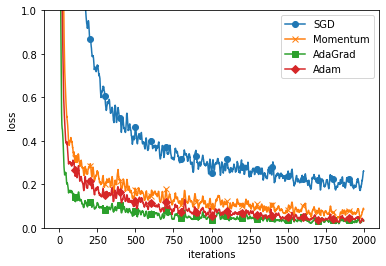

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


### 7.2 Navie

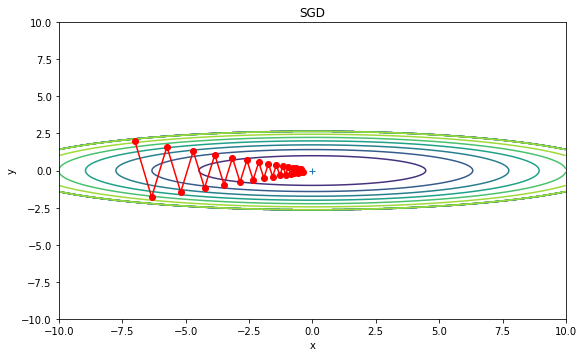

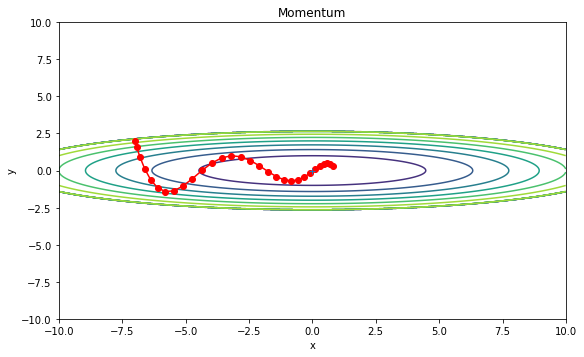

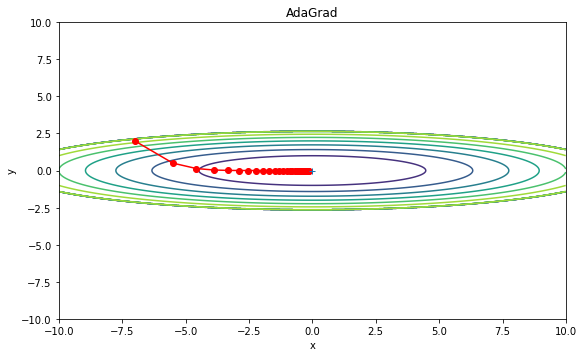

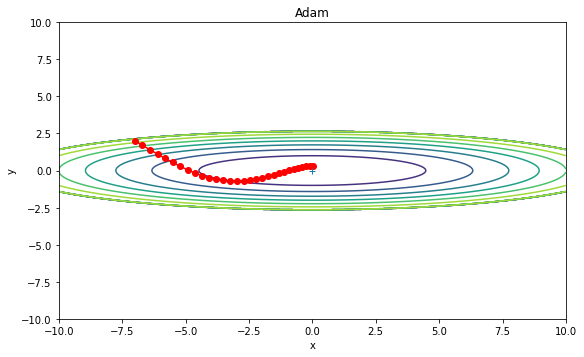

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.figure(figsize=(20,12))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()